In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload
threeML_config["parallel"]["use_parallel"]=True

Welcome to JupyROOT 6.24/06


20:51:06 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=631061;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=506850;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


20:51:07 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=452516;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=452660;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


20:51:07 INFO      Starting 3ML!                                                                     ]8;id=74632;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=541930;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=428014;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=610298;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=607266;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=785972;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=15600;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=281984;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

20:51:08 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=664443;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=411400;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

20:51:09 WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=338592;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=258891;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=63336;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=899440;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

20:51:09 WARNING   No fermitools installed                                              ]8;id=133207;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=730381;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 46.14it/s]   

Yourlib init successfully!!!


Load sub from Myspeedup: 100%|██████████| 37/37 [00:19<00:00, 46.14it/s]

In [9]:
rs = parallel.parallel_client.ParallelClient()

In [10]:
ra1,dec1=0,90
data_radius = 110.0
model_radius = 120.0
roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)
lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=2,  detector="WCDA", roi=roi, pf=True)
Diffuse = my.set_diffusebkg(
            17.387411424977117, 62.79899812924395, 110, 5, Kb=(1e-17, 1e-9), Kf=False, indexf=False, name="Fullsky"
            )

lm.add_source(Diffuse)

22:30:22 INFO      J0007P7303u in data_radius: 110.0                                                   ]8;id=776269;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=122134;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0056P6346u in data_radius: 110.0                                                   ]8;id=853020;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=254979;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0249P6022 in data_radius: 110.0                                                    ]8;id=765179;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=609865;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0343P5254u in data_radius: 110.0                                                   ]8;id=475608;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=371622;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0359P5406 in data_radius: 110.0                                                    ]8;id=935370;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=696096;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0428P5531 in data_radius: 110.0                                                    ]8;id=202869;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=533635;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0500P4454 in data_radius: 110.0                                                    ]8;id=779986;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=87429;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0534P3533 in data_radius: 110.0                                                    ]8;id=451392;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=549700;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0534P2200u in data_radius: 110.0                                                   ]8;id=469006;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=928336;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0542P2311u in data_radius: 110.0                                                   ]8;id=170571;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=446849;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0617P2234 in data_radius: 110.0                                                    ]8;id=649757;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=215242;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0622P3754 in data_radius: 110.0                                                    ]8;id=283299;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=636322;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J0634P1741u in data_radius: 110.0                                                   ]8;id=743134;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=147971;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

22:30:23 INFO      J0703P1405 in data_radius: 110.0                                                    ]8;id=975372;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=129415;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1104P3810 in data_radius: 110.0                                                    ]8;id=865270;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=370025;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1219P2915 in data_radius: 110.0                                                    ]8;id=762622;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=272504;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1653P3943 in data_radius: 110.0                                                    ]8;id=992308;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=630590;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1727P5016 in data_radius: 110.0                                                    ]8;id=886996;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=860199;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1809M1918u in data_radius: 110.0                                                   ]8;id=506674;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=321342;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1813M1245 in data_radius: 110.0                                                    ]8;id=745131;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=262755;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1814M1719u in data_radius: 110.0                                                   ]8;id=210534;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=612354;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1825M1418 in data_radius: 110.0                                                    ]8;id=530675;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=781678;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1825M1256u in data_radius: 110.0                                                   ]8;id=284215;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=811964;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1825M1337u in data_radius: 110.0                                                   ]8;id=559735;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=481389;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1831M1007u in data_radius: 110.0                                                   ]8;id=612413;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=758651;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1834M0831 in data_radius: 110.0                                                    ]8;id=906472;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=983984;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1837M0654u in data_radius: 110.0                                                   ]8;id=558284;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=255174;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1839M0548u in data_radius: 110.0                                                   ]8;id=378069;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=582545;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

22:30:24 INFO      J1841M0519 in data_radius: 110.0                                                    ]8;id=180760;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=942925;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1843M0335u in data_radius: 110.0                                                   ]8;id=819336;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=488528;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1848M0153u in data_radius: 110.0                                                   ]8;id=880884;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=891809;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1850M0004u in data_radius: 110.0                                                   ]8;id=741877;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=70120;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1852P0050u in data_radius: 110.0                                                   ]8;id=526937;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=249351;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1857P0245 in data_radius: 110.0                                                    ]8;id=154664;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=341549;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1857P0203u in data_radius: 110.0                                                   ]8;id=357267;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=597134;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1858P0330 in data_radius: 110.0                                                    ]8;id=140494;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=371226;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1902P0648 in data_radius: 110.0                                                    ]8;id=107972;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=558996;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1906P0712 in data_radius: 110.0                                                    ]8;id=337667;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=968528;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1907P0826 in data_radius: 110.0                                                    ]8;id=634488;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=466212;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1908P0615u in data_radius: 110.0                                                   ]8;id=650224;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=258251;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1910P0516 in data_radius: 110.0                                                    ]8;id=536984;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=44244;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1912P1014u in data_radius: 110.0                                                   ]8;id=540707;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=402152;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1914P1150u in data_radius: 110.0                                                   ]8;id=508450;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=215640;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

22:30:25 INFO      J1922P1403 in data_radius: 110.0                                                    ]8;id=299212;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=929456;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1924P1609 in data_radius: 110.0                                                    ]8;id=85257;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=421915;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1928P1746u in data_radius: 110.0                                                   ]8;id=259474;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=52373;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1929P1846u in data_radius: 110.0                                                   ]8;id=368005;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=232798;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1937P2128 in data_radius: 110.0                                                    ]8;id=541143;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=791596;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1945P2424 in data_radius: 110.0                                                    ]8;id=216363;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=67992;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1952P2922 in data_radius: 110.0                                                    ]8;id=559189;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=980470;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1954P2836u in data_radius: 110.0                                                   ]8;id=223908;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=1268;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1954P3253 in data_radius: 110.0                                                    ]8;id=446516;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=895400;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J1956P2921 in data_radius: 110.0                                                    ]8;id=270366;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=6346;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2002P3244u in data_radius: 110.0                                                   ]8;id=541274;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=251059;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2005P3415 in data_radius: 110.0                                                    ]8;id=527232;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=13551;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2005P3050 in data_radius: 110.0                                                    ]8;id=726367;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=163298;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2018P3643u in data_radius: 110.0                                                   ]8;id=653602;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=239421;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2020P4034 in data_radius: 110.0                                                    ]8;id=464469;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=12535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2020P3638 in data_radius: 110.0                                                    ]8;id=530620;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=860239;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

22:30:26 INFO      J2020P3649u in data_radius: 110.0                                                   ]8;id=630283;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=263102;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2031P4052u in data_radius: 110.0                                                   ]8;id=174370;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=185739;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2031P4127u in data_radius: 110.0                                                   ]8;id=658054;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=142515;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2108P5153u in data_radius: 110.0                                                   ]8;id=86020;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=553878;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2200P5643u in data_radius: 110.0                                                   ]8;id=426130;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=668163;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2228P6100u in data_radius: 110.0                                                   ]8;id=793187;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=386011;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2229P5927u in data_radius: 110.0                                                   ]8;id=904336;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=809025;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2238P5900 in data_radius: 110.0                                                    ]8;id=493874;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=155063;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2323P5854 in data_radius: 110.0                                                    ]8;id=4159;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=24324;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      J2346P5138 in data_radius: 110.0                                                    ]8;id=460465;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=249041;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#256\256]8;;\

         INFO      Set diffuse range: [15, 235] [-5, 5]                                                ]8;id=409089;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=941549;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#697\697]8;;\

         INFO      ra dec coner:                                                                       ]8;id=190928;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=666445;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#698\698]8;;\

         INFO      (279.09940578825695, -18.22289366034062)                                            ]8;id=668389;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=660933;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#699\699]8;;\

         INFO      (108.6177558210338, -21.891170416618074)                                            ]8;id=745434;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=542487;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#700\700]8;;\

         INFO      (117.90918254401687, -17.059316376614664)                                           ]8;id=523258;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=612051;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#701\701]8;;\

         INFO      (269.9394349722921, -13.487384376599318)                                            ]8;id=634588;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=425896;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#702\702]8;;\

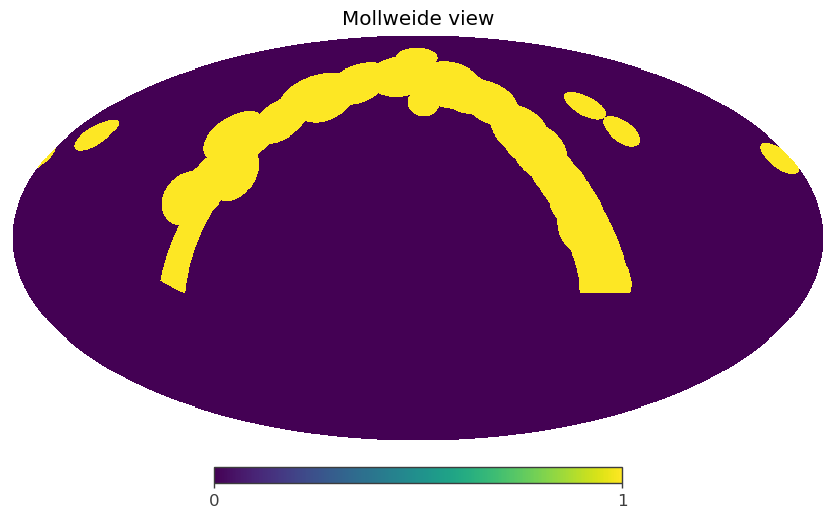

In [11]:
%matplotlib inline
nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix

pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = 90-hp.pix2ang(nside, pixIdx)[0]/np.pi*180 # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1]/np.pi*180 # phis, same
signal=np.zeros(npix,dtype=np.float64)
c_icrs = SkyCoord(ra=new_lons*u.degree, dec=new_lats*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

mask = np.zeros(npix,dtype=np.float64)
for psc in lm.point_sources:
    ra = lm.point_sources[psc]._sky_position.ra.value
    dec = lm.point_sources[psc]._sky_position.dec.value
    mask = (mask.astype(np.bool) | (np.array(my.distance(ra, dec, new_lons, new_lats)<=6)))
for exts in lm.extended_sources:
    if exts != "Diffuse":
        ra = lm.extended_sources[exts].spatial_shape.lon0.value
        dec = lm.extended_sources[exts].spatial_shape.lat0.value
        mask = (mask.astype(np.bool) | (np.array(my.distance(ra, dec, new_lons, new_lats)<=10)))
mask = (mask.astype(np.bool) | ((c_l>13) & (c_l<233) & (c_b<5) & (c_b>-5)))
mask = (mask.astype(np.bool) & ((new_lats>-20) & (new_lats<80)))
signal[mask]=1
hp.mollview(signal)

22:32:05 INFO      Region of Interest:                                                                   ]8;id=527808;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=173049;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#274\274]8;;\

         INFO      -------------------                                                                   ]8;id=261695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=210684;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (0.000, 90.000), model radius:        ]8;id=362438;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=981740;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  120.000 deg, display radius: 110.000 deg, threshold = 0.50                                       

         INFO                                                                                            ]8;id=801822;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=538304;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#278\278]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=182127;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=238683;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      --------------------                                                                  ]8;id=787424;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=567203;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#280\280]8;;\

         INFO      Width x height: 1412 x 1412 px                                                        ]8;id=713562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=384527;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#282\282]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=252633;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=912246;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO                                                                                            ]8;id=351774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=798871;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#286\286]8;;\

         INFO      Response:                                                                             ]8;id=607372;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=602333;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#287\287]8;;\

         INFO      ---------                                                                             ]8;id=199759;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=969066;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#288\288]8;;\

         INFO      Response file:                                                                   ]8;id=211012;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=765180;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=959939;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=340378;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=738416;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=668212;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=953248;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=67927;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      Map Tree:                                                                             ]8;id=910627;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=255983;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      ----------                                                                            ]8;id=880486;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=572376;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#294\294]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,6.096439e+08,6.087837e+08,1.001413,1554754,5097.246688
1,1,1024,RING,3.022366e+08,3.012927e+08,1.003133,1554754,5097.246688
2,2,1024,RING,5.078834e+07,5.045208e+07,1.006665,1554754,5097.246688
3,3,1024,RING,2.119470e+07,2.096513e+07,1.010950,1554754,5097.246688
4,4,1024,RING,5.547426e+06,5.454882e+06,1.016965,1554754,5097.246688
5,5,1024,RING,1.451348e+06,1.414295e+06,1.026199,1554754,5097.246688


         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=239597;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=363194;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 149.26 Mb                                                       ]8;id=840231;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=966935;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=518392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=387580;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=732103;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=678153;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#299\299]8;;\

         INFO      -------------------------------                                                       ]8;id=844637;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=821828;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=452168;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=382130;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#301\301]8;;\

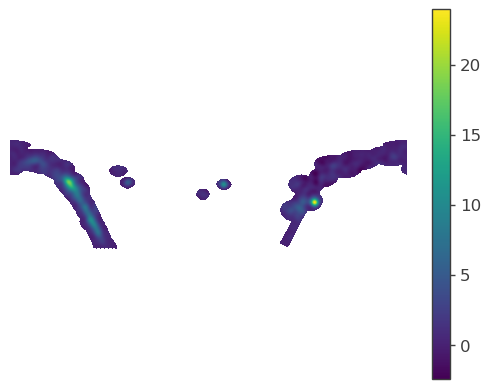

In [12]:
%matplotlib inline
#####   Data Initialize

# maptree = "../../data/gcd_new.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"
# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"
maptree =  "../../data/20210305-20230731_trans_fromhsc.root"

# response = "../../data/DR_ihep_MK2.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

response = "../../data/DR_ihep_MK2_newoldDRpsf.root"
# response = "../../data/DR_ihep_mk_luoyu.root"
# response = "../../data/DR_ihep_mk_MC1.root"
# response = "../../data/DR_ihep_mk_MC2.root"
# response = "../../data/DR_ihep_MK2_luoyu.root"

region_name="Fullsky"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

ra1,dec1=0,90
data_radius = 110.0
model_radius = 120.0

roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

# roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)

WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 5)
WCDA.display()
fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
Modelname="Fullsky_catalog"
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')
fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

In [13]:
WCDA.psf_integration_method="exact"
lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
lm.display(complete=True)

result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, verbose=True, mini="minuit")
sources = my.get_sources(lm,result)

resu = my.getressimple(WCDA, lm)
new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
print(new_source_lon_lat)
plt.figure()
hp.gnomview(resu,norm='',lonra=[0, 360], latra=[-20, 80],reso=6, title=Modelname)
plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
plt.show()
plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

Flux_WCDA1, jls1  = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse", ifpowerlawM=0)

%matplotlib inline
import matplotlib as mpl

x_Max=50.
x_Min=1
y_Min=0.8e-13
y_Max=2e-11
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=30,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax,
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA1,"Diffuse","tab:blue")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')

Model summary:
==============

                   N
Point sources     14
Extended sources  56
Particle sources   0

Free parameters (140):
--------------------

                                          value min_value max_value   
J0007P7303u.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J0007P7303u.spectrum.main.Powerlaw.index  -2.74     -2.96     -2.52   
J0056P6346u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J0056P6346u.spectrum.main.Powerlaw.index  -2.35     -2.61     -2.09   
J0249P6022.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
...                                         ...       ...       ...   
J2323P5854.spectrum.main.Powerlaw.index   -3.18      -3.5     -2.86   
J2346P5138.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J2346P5138.spectrum.main.Powerlaw.index   -3.26      -3.6     -2.92   
Diffuse.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index     -2.733      -4.0      -1.0   

                                                    unit  
J0007P7303u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J0007P7303u.spectrum.main.Powerlaw.index                  
J0056P6346u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J0056P6346u.spectrum.main.Powerlaw.index                  
J0249P6022.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
...                                                  ...  
J2323P5854.spectrum.main.Powerlaw.index                   
J2346P5138.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J2346P5138.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

[140 rows x 4 columns]

Fixed parameters (266):
---------------------

                                                                                    value   
J0007P7303u.position.ra                                                              1.48  \
J0007P7303u.position.dec                                                            73.15   
J0007P7303u.spectrum.main.Powerlaw.piv                                       3000000000.0   
J0056P6346u.Gaussian_on_sphere.lon0                                                 13.78   
J0056P6346u.Gaussian_on_sphere.lat0                                                 63.96   
...                                                                                   ...   
J2346P5138.spectrum.main.Powerlaw.piv                                        3000000000.0   
Diffuse.SpatialTemplate_2D.K                                                          1.0   
Diffuse.SpatialTemplate_2D.hash         2058658993146145140454157266390905861896564297...   
Diffuse.SpatialTemplate_2D.ihdu                                                       0.0   
Diffuse.spectrum.main.Powerlaw.piv                                           3000000000.0   

                                       min_value max_value   unit  
J0007P7303u.position.ra                     1.28      1.68    deg  
J0007P7303u.position.dec                   72.95     73.35    deg  
J0007P7303u.spectrum.main.Powerlaw.piv      None      None    keV  
J0056P6346u.Gaussian_on_sphere.lon0        13.48     14.08    deg  
J0056P6346u.Gaussian_on_sphere.lat0        63.66     64.26    deg  
...                                          ...       ...    ...  
J2346P5138.spectrum.main.Powerlaw.piv       None      None    keV  
Diffuse.SpatialTemplate_2D.K                None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash             None      None         
Diffuse.SpatialTemplate_2D.ihdu              0.0      None         
Diffuse.spectrum.main.Powerlaw.piv          None      None    keV  

[266 rows x 4 columns]

Properties (2):
--------------------

                                                                                  value   
Diffuse.SpatialTemplate_2D.fits_file  /data/home/cwy/Science/3MLWCDA/data/Fullsky_du...  \
Diffuse.SpatialTemplate_2D.f

22:32:16 INFO      Considering 5 dec bins for extended source J0056P6346u           ]8;id=159896;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=418105;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 63.960                       ]8;id=180125;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=672403;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J0249P6022            ]8;id=413214;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=569445;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 60.490                       ]8;id=517619;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=660445;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J0343P5254u           ]8;id=980014;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=808570;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 53.050                       ]8;id=386848;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=447117;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J0359P5406            ]8;id=612902;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=510261;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 54.210                       ]8;id=403676;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=663523;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 8 dec bins for extended source J0428P5531            ]8;id=732706;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=117627;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 55.530                       ]8;id=590277;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=926119;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J0500P4454            ]8;id=25105;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=283507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 44.920                       ]8;id=734517;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=691281;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 10 dec bins for extended source J0542P2311u          ]8;id=698741;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=445323;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 23.190                       ]8;id=166849;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=604648;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J0617P2234            ]8;id=421480;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=924192;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 22.570                       ]8;id=95242;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=453148;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J0622P3754            ]8;id=908523;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=643814;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 37.930                       ]8;id=493336;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=677610;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 9 dec bins for extended source J0634P1741u           ]8;id=650483;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=11200;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 17.720                       ]8;id=134649;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=984548;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 10 dec bins for extended source J0703P1405           ]8;id=312999;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=835122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 14.550                       ]8;id=277763;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=879821;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1809M1918u           ]8;id=711811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=75077;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -19.320                      ]8;id=132927;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=731553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J1814M1719u           ]8;id=27283;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=332067;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -17.330                      ]8;id=187227;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=797217;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J1825M1418            ]8;id=105960;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=144272;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -14.320                      ]8;id=786256;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=676806;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=571072;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=767182;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -13.040                      ]8;id=740400;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=302115;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=844159;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=354829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -13.730                      ]8;id=437637;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=977466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=158235;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=586191;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -10.120                      ]8;id=293958;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=596101;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=97942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=761000;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -8.530                       ]8;id=826116;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=679408;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=688447;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=441744;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -6.900                       ]8;id=377858;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=872183;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J1839M0548u           ]8;id=940119;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=968999;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -5.900                       ]8;id=580270;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=978673;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=493195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=60103;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -5.330                       ]8;id=833083;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=475170;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J1843M0335u           ]8;id=111448;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=739184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -3.500                       ]8;id=89575;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=162334;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1848M0153u           ]8;id=258599;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=365136;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -1.890                       ]8;id=718529;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=794160;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=97997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=896951;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -0.070                       ]8;id=766454;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=330067;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J1852P0050u           ]8;id=601809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=289502;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 1.400                        ]8;id=713393;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=582543;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J1857P0245            ]8;id=589251;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=361076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 2.750                        ]8;id=710321;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=778829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J1857P0203u           ]8;id=594991;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=181187;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 1.980                        ]8;id=835406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=833711;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J1858P0330            ]8;id=226826;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=919447;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 3.700                        ]8;id=700982;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=588654;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J1906P0712            ]8;id=247211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=939058;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 7.200                        ]8;id=707081;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=542391;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J1907P0826            ]8;id=771046;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=132782;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 8.440                        ]8;id=369154;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=555274;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=340329;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=987868;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 6.260                        ]8;id=955941;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=673786;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1910P0516            ]8;id=271960;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=939990;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 5.070                        ]8;id=979122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=150572;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=215031;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=574956;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 10.250                       ]8;id=450797;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=58907;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1914P1150u           ]8;id=951589;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=178800;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 11.740                       ]8;id=454239;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=78477;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

22:32:17 INFO      Considering 4 dec bins for extended source J1922P1403            ]8;id=967835;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=621765;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 14.060                       ]8;id=560648;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=589243;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 9 dec bins for extended source J1924P1609            ]8;id=705366;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=268752;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 16.150                       ]8;id=184876;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=71433;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=956441;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=193129;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 17.780                       ]8;id=249987;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=793363;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1929P1846u           ]8;id=722961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=357171;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 18.770                       ]8;id=112901;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=925059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 9 dec bins for extended source J1937P2128            ]8;id=647933;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=250145;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 21.000                       ]8;id=39480;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=29645;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 9 dec bins for extended source J1945P2424            ]8;id=536501;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=984171;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 24.400                       ]8;id=676556;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=479660;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J1954P3253            ]8;id=744801;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=260531;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 32.880                       ]8;id=862248;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=844582;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 8 dec bins for extended source J1956P2921            ]8;id=908873;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=145605;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 29.350                       ]8;id=468876;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=424490;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J2005P3415            ]8;id=407651;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=197203;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 34.250                       ]8;id=300435;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=315670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J2005P3050            ]8;id=991586;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=146613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 30.990                       ]8;id=213883;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=486836;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2018P3643u           ]8;id=350481;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=994954;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.750                       ]8;id=594913;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=91156;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2020P4034            ]8;id=792402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=232100;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 40.570                       ]8;id=3449;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=812236;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 9 dec bins for extended source J2020P3638            ]8;id=735069;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=31243;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.630                       ]8;id=420014;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=998947;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 3 dec bins for extended source J2020P3649u           ]8;id=33716;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=692858;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.910                       ]8;id=567591;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=174621;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J2031P4052u           ]8;id=146884;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=793361;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 40.880                       ]8;id=857091;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=250469;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2031P4127u           ]8;id=30809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=924506;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 41.600                       ]8;id=421539;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=504525;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 3 dec bins for extended source J2108P5153u           ]8;id=259524;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=272445;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 51.950                       ]8;id=546739;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=574106;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J2200P5643u           ]8;id=902625;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=690484;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 56.730                       ]8;id=44282;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=604989;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J2228P6100u           ]8;id=232061;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=649514;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 61.020                       ]8;id=606859;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=167506;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 12 dec bins for extended source J2229P5927u          ]8;id=283015;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=711804;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 59.450                       ]8;id=609009;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=251102;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J2238P5900            ]8;id=17274;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=181485;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 58.920                       ]8;id=103211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=230190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 10 dec bins for extended source Diffuse              ]8;id=768221;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=80505;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = -17.643                      ]8;id=281146;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=661036;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=29809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=829001;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=572485;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=746767;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

22:34:38 INFO      trial values:                                                           ]8;id=629638;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=890967;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1010\1010]8;;\
                  -21.3,-2.74,-21.839,-2.35,-21.708,-2.52,-22.538,-1.7,-22.745,-1.74,-21.3                         
                  25,-2.66,-22.161,-2.53,-22.367,-2.37,-20.676,-2.69,-21.682,-1.95,-21.71,                         
                  -2.92,-22.409,-1.82,-21.815,-1.65,-21.644,-1.98,-21.434,-3.41,-22.469,-2                         
                  .67,-21.424,-2.94,-22.31,-3.09,-21.461,-2.24,-21.613,-2.61,-20.577,-2.83                         
                  ,-20.407,-2.98,-21.082,-2.61,-20.983,-2.55,-20.75,-2.71,-21.223,-3.08,-2                         
                  0.81,-2.92,-21.335,-2.65,-20.818,-2.88,-21.045,-2.58,-21.152,-2.65,-21.2                         
                  76,-2.49,-21.331,-2.74,-21.394,-2.93,-21.775,-2.46,-21.547,-2.63,-22.347                         
                  ,-2.39,-21.996,-2.72,-21.873,-2.62,-21.099,-2.42,-22.066,-2.54,-21.513,-                         
                  2.68,-21.963,-2.34,-21.863,-2.62,-21.353,-2.54,-22.102,-2.22,-21.606,-2.                         
                  37,-21.682,-2.43,-21.37,-2.56,-22.26,-2.52,-22.469,-2.22,-22.208,-2.45,-                         
                  21.833,-2.03,-22.469,-2.21,-21.452,-2.58,-22.538,-1.99,-21.66,-1.94,-21.                         
                  627,-2.91,-21.445,-2.62,-22.26,-1.78,-22.114,-2.81,-21.513,-2.29,-23.097                         
                  ,-1.44,-22.42,-1.77,-21.625,-2.26,-20.827,-2.67,-21.719,-2.39,-21.959,-3                         
                  .18,-22.244,-3.26,-19.984,-2.733 -> logL = -506729.256                                           

22:35:21 INFO      trial values:                                                           ]8;id=358267;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=583896;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1010\1010]8;;\
                  -21.209,-2.74,-21.839,-2.35,-21.708,-2.52,-22.538,-1.7,-22.745,-1.74,-21                         
                  .325,-2.66,-22.161,-2.53,-22.367,-2.37,-20.676,-2.69,-21.682,-1.95,-21.7                         
                  1,-2.92,-22.409,-1.82,-21.815,-1.65,-21.644,-1.98,-21.434,-3.41,-22.469,                         
                  -2.67,-21.424,-2.94,-22.31,-3.09,-21.461,-2.24,-21.613,-2.61,-20.577,-2.                         
                  83,-20.407,-2.98,-21.082,-2.61,-20.983,-2.55,-20.75,-2.71,-21.223,-3.08,                         
                  -20.81,-2.92,-21.335,-2.65,-20.818,-2.88,-21.045,-2.58,-21.152,-2.65,-21                         
                  .276,-2.49,-21.331,-2.74,-21.394,-2.93,-21.775,-2.46,-21.547,-2.63,-22.3                         
                  47,-2.39,-21.996,-2.72,-21.873,-2.62,-21.099,-2.42,-22.066,-2.54,-21.513                         
                  ,-2.68,-21.963,-2.34,-21.863,-2.62,-21.353,-2.54,-22.102,-2.22,-21.606,-                         
                  2.37,-21.682,-2.43,-21.37,-2.56,-22.26,-2.52,-22.469,-2.22,-22.208,-2.45                         
                  ,-21.833,-2.03,-22.469,-2.21,-21.452,-2.58,-22.538,-1.99,-21.66,-1.94,-2                         
                  1.627,-2.91,-21.445,-2.62,-22.26,-1.78,-22.114,-2.81,-21.513,-2.29,-23.0                         
                  97,-1.44,-22.42,-1.77,-21.625,-2.26,-20.827,-2.67,-21.719,-2.39,-21.959,                         
                  -3.18,-22.244,-3.26,-19.984,-2.733 -> logL = -506750.443                                         

22:36:18 INFO      trial values:                                                           ]8;id=48211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=264024;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1010\1010]8;;\
                  -21.402,-2.74,-21.839,-2.35,-21.708,-2.52,-22.538,-1.7,-22.745,-1.74,-21                         
                  .325,-2.66,-22.161,-2.53,-22.367,-2.37,-20.676,-2.69,-21.682,-1.95,-21.7                         
                  1,-2.92,-22.409,-1.82,-21.815,-1.65,-21.644,-1.98,-21.434,-3.41,-22.469,                         
                  -2.67,-21.424,-2.94,-22.31,-3.09,-21.461,-2.24,-21.613,-2.61,-20.577,-2.                         
                  83,-20.407,-2.98,-21.082,-2.61,-20.983,-2.55,-20.75,-2.71,-21.223,-3.08,                         
                  -20.81,-2.92,-21.335,-2.65,-20.818,-2.88,-21.045,-2.58,-21.152,-2.65,-21                         
                  .276,-2.49,-21.331,-2.74,-21.394,-2.93,-21.775,-2.46,-21.547,-2.63,-22.3                         
                  47,-2.39,-21.996,-2.72,-21.873,-2.62,-21.099,-2.42,-22.066,-2.54,-21.513                         
                  ,-2.68,-21.963,-2.34,-21.863,-2.62,-21.353,-2.54,-22.102,-2.22,-21.606,-                         
                  2.37,-21.682,-2.43,-21.37,-2.56,-22.26,-2.52,-22.469,-2.22,-22.208,-2.45                         
                  ,-21.833,-2.03,-22.469,-2.21,-21.452,-2.58,-22.538,-1.99,-21.66,-1.94,-2                         
                  1.627,-2.91,-21.445,-2.62,-22.26,-1.78,-22.114,-2.81,-21.513,-2.29,-23.0                         
                  97,-1.44,-22.42,-1.77,-21.625,-2.26,-20.827,-2.67,-21.719,-2.39,-21.959,                         
                  -3.18,-22.244,-3.26,-19.984,-2.733 -> logL = -506721.095                                         

22:36:49 INFO      trial values:                                                           ]8;id=892238;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=465237;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1010\1010]8;;\
                  -21.287,-2.74,-21.839,-2.35,-21.708,-2.52,-22.538,-1.7,-22.745,-1.74,-21                         
                  .325,-2.66,-22.161,-2.53,-22.367,-2.37,-20.676,-2.69,-21.682,-1.95,-21.7                         
                  1,-2.92,-22.409,-1.82,-21.815,-1.65,-21.644,-1.98,-21.434,-3.41,-22.469,                         
                  -2.67,-21.424,-2.94,-22.31,-3.09,-21.461,-2.24,-21.613,-2.61,-20.577,-2.                         
                  83,-20.407,-2.98,-21.082,-2.61,-20.983,-2.55,-20.75,-2.71,-21.223,-3.08,                         
                  -20.81,-2.92,-21.335,-2.65,-20.818,-2.88,-21.045,-2.58,-21.152,-2.65,-21                         
                  .276,-2.49,-21.331,-2.74,-21.394,-2.93,-21.775,-2.46,-21.547,-2.63,-22.3                         
                  47,-2.39,-21.996,-2.72,-21.873,-2.62,-21.099,-2.42,-22.066,-2.54,-21.513                         
                  ,-2.68,-21.963,-2.34,-21.863,-2.62,-21.353,-2.54,-22.102,-2.22,-21.606,-                         
                  2.37,-21.682,-2.43,-21.37,-2.56,-22.26,-2.52,-22.469,-2.22,-22.208,-2.45                         
                  ,-21.833,-2.03,-22.469,-2.21,-21.452,-2.58,-22.538,-1.99,-21.66,-1.94,-2                         
                  1.627,-2.91,-21.445,-2.62,-22.26,-1.78,-22.114,-2.81,-21.513,-2.29,-23.0                         
                  97,-1.44,-22.42,-1.77,-21.625,-2.26,-20.827,-2.67,-21.719,-2.39,-21.959,                         
                  -3.18,-22.244,-3.26,-19.984,-2.733 -> logL = -506731.439                                         

22:37:17 INFO      trial values:                                                           ]8;id=814390;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=511122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1010\1010]8;;\
                  -21.314,-2.74,-21.839,-2.35,-21.708,-2.52,-22.538,-1.7,-22.745,-1.74,-21                         
                  .325,-2.66,-22.161,-2.53,-22.367,-2.37,-20.676,-2.69,-21.682,-1.95,-21.7                         
                  1,-2.92,-22.409,-1.82,-21.815,-1.65,-21.644,-1.98,-21.434,-3.41,-22.469,                         
                  -2.67,-21.424,-2.94,-22.31,-3.09,-21.461,-2.24,-21.613,-2.61,-20.577,-2.                         
                  83,-20.407,-2.98,-21.082,-2.61,-20.983,-2.55,-20.75,-2.71,-21.223,-3.08,                         
                  -20.81,-2.92,-21.335,-2.65,-20.818,-2.88,-21.045,-2.58,-21.152,-2.65,-21                         
                  .276,-2.49,-21.331,-2.74,-21.394,-2.93,-21.775,-2.46,-21.547,-2.63,-22.3                         
                  47,-2.39,-21.996,-2.72,-21.873,-2.62,-21.099,-2.42,-22.066,-2.54,-21.513                         
                  ,-2.68,-21.963,-2.34,-21.863,-2.62,-21.353,-2.54,-22.102,-2.22,-21.606,-                         
                  2.37,-21.682,-2.43,-21.37,-2.56,-22.26,-2.52,-22.469,-2.22,-22.208,-2.45                         
                  ,-21.833,-2.03,-22.469,-2.21,-21.452,-2.58,-22.538,-1.99,-21.66,-1.94,-2                         
                  1.627,-2.91,-21.445,-2.62,-22.26,-1.78,-22.114,-2.81,-21.513,-2.29,-23.0                         
                  97,-1.44,-22.42,-1.77,-21.625,-2.26,-20.827,-2.67,-21.719,-2.39,-21.959,                         
                  -3.18,-22.244,-3.26,-19.984,-2.733 -> logL = -506727.341                                         

22:37:44 INFO      trial values:                                                           ]8;id=680226;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=340681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1010\1010]8;;\
                  -21.3,-2.7128,-21.839,-2.35,-21.708,-2.52,-22.538,-1.7,-22.745,-1.74,-21                         
                  .325,-2.66,-22.161,-2.53,-22.367,-2.37,-20.676,-2.69,-21.682,-1.95,-21.7                         
                  1,-2.92,-22.409,-1.82,-21.815,-1.65,-21.644,-1.98,-21.434,-3.41,-22.469,                         
                  -2.67,-21.424,-2.94,-22.31,-3.09,-21.461,-2.24,-21.613,-2.61,-20.577,-2.                         
                  83,-20.407,-2.98,-21.082,-2.61,-20.983,-2.55,-20.75,-2.71,-21.223,-3.08,                         
                  -20.81,-2.92,-21.335,-2.65,-20.818,-2.88,-21.045,-2.58,-21.152,-2.65,-21                         
                  .276,-2.49,-21.331,-2.74,-21.394,-2.93,-21.775,-2.46,-21.547,-2.63,-22.3                         
                  47,-2.39,-21.996,-2.72,-21.873,-2.62,-21.099,-2.42,-22.066,-2.54,-21.513                         
                  ,-2.68,-21.963,-2.34,-21.863,-2.62,-21.353,-2.54,-22.102,-2.22,-21.606,-                         
                  2.37,-21.682,-2.43,-21.37,-2.56,-22.26,-2.52,-22.469,-2.22,-22.208,-2.45                         
                  ,-21.833,-2.03,-22.469,-2.21,-21.452,-2.58,-22.538,-1.99,-21.66,-1.94,-2                         
                  1.627,-2.91,-21.445,-2.62,-22.26,-1.78,-22.114,-2.81,-21.513,-2.29,-23.0                         
                  97,-1.44,-22.42,-1.77,-21.625,-2.26,-20.827,-2.67,-21.719,-2.39,-21.959,                         
                  -3.18,-22.244,-3.26,-19.984,-2.733 -> logL = -506732.994                                         

KeyboardInterrupt: 

In [21]:
import uproot
file = uproot.open(maptree)

In [18]:
resdir = my.write_resmap(region_name, Modelname, WCDA, roi, maptree, ra1, dec1, "Fullsky_fixsc",np.zeros(lm.get_number_of_point_sources()),np.zeros(lm.get_number_of_extended_sources()), data_radius=data_radius)

Fullsky_fixsc_res
processing at nHit0 0


  5%|▍         | 387968/8443904 [05:05<1:45:51, 1268.31it/s]


KeyboardInterrupt: 

In [ ]:
%matplotlib inline
resmap = my.getllhskymap(resdir, region_name, ra1, dec1, data_radius, ifsave=True, ifdraw=1, tofits=1)
my.getsig1D(resmap, region_name, Modelname, region_name)